## LSTM On the Merged Data - Final Attempt at finding patterns 

In [19]:
# Imports 
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Final_Merged_Data.csv", index_col=0)

In [7]:
features = df[["Average Sentiment", "Normalised Average Price"]]

In [12]:
# Create Sequences 
def create_sequences(data, sequence_length):
    X, y = [], [] 
    for i in range(len(data) - sequence_length): 
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length, 1]) # Normalised Average 
    return np.array(X), np.array(y) 

sequence_length = 10 

X,y = create_sequences(features.values, sequence_length) 

# Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train = X_train.astype('float32')  # Convert to float32

# Build LSTM Model 
model = Sequential() 
model.add(LSTM(50, input_shape=(sequence_length, 2), return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")

In [24]:
# Train The Model 
model.fit(X_train, y_train, batch_size=64, epochs=60, validation_data=(X_test, y_test))

Epoch 1/60
3/3 [==============================] - 0s 17ms/step - loss: 0.0096 - val_loss: 0.0272
Epoch 2/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0100 - val_loss: 0.0235
Epoch 3/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0089 - val_loss: 0.0187
Epoch 4/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0094 - val_loss: 0.0149
Epoch 5/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0095 - val_loss: 0.0183
Epoch 6/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0086 - val_loss: 0.0234
Epoch 7/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0092 - val_loss: 0.0265
Epoch 8/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0094 - val_loss: 0.0195
Epoch 9/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0083 - val_loss: 0.0170
Epoch 10/60
3/3 [==============================] - 0s 8ms/step - loss: 0.0084 - val_loss: 0.0185
Epoch 11/60
3/3 [=====================

In [22]:
# Evaluate the Model
predictions = model.predict(X_test)
mse = np.mean((predictions - y_test)**2)
print(f"Mean Squared Error: {mse}")

2/2 [==============================] - 0s 3ms/step
Mean Squared Error: 0.03983071836663729


1/1 [==============================] - 0s 10ms/step


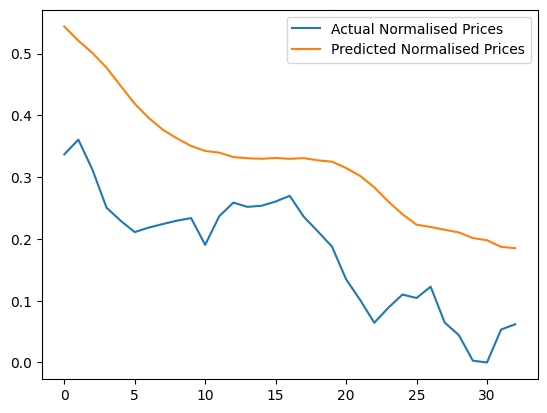

In [23]:
# Make Predictions
last_sequence = X[-1]
prediction = model.predict(np.array([last_sequence]))[0][0]

# Visualize Results
actual_prices = df['Normalised Average Price'].values
plt.plot(actual_prices[-len(predictions):], label='Actual Normalised Prices')
plt.plot(predictions, label='Predicted Normalised Prices')
plt.legend()
plt.show()